In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import scipy.stats as stats
%matplotlib inline

In [7]:
hn2019 = pd.read_csv('hn_2019.csv', parse_dates=['date'])

In [8]:
hn2019.head()

,id,deleted,type,by,time,text,dead,parent,kids,url,score,title,descendants,date
0,16248947,True,story,NaN,1.546453e+09,NaN,False,NaN,[],NaN,NaN,NaN,NaN,2019-01-02 18:09:37
1,16249109,True,story,NaN,1.546453e+09,NaN,False,NaN,[],NaN,NaN,NaN,NaN,2019-01-02 18:09:37
2,16249110,True,story,NaN,1.546453e+09,NaN,False,NaN,[],NaN,NaN,NaN,NaN,2019-01-02 18:09:37
3,18797959,False,comment,ehsankia,1.546301e+09,Tell me about it. To cancel my NYT subscriptio...,False,18797269.0,[],NaN,NaN,NaN,NaN,2019-01-01 00:00:56
4,18797960,False,comment,shostack,1.546301e+09,This is actually something I&#x27;ve encounter...,False,18790788.0,[],NaN,NaN,NaN,NaN,2019-01-01 00:01:20


In [10]:
hn2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127116 entries, 0 to 3127115
Data columns (total 14 columns):
id             int64
deleted        bool
type           object
by             object
time           float64
text           object
dead           bool
parent         float64
kids           object
url            object
score          float64
title          object
descendants    float64
date           datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 292.3+ MB


In [11]:
hn2019['day'] = hn2019['date'].dt.dayofweek

In [15]:
hn2019.groupby('day').count()['id']

day
0    483017
1    516177
2    515055
3    503990
4    474814
5    313099
6    320964
Name: id, dtype: int64

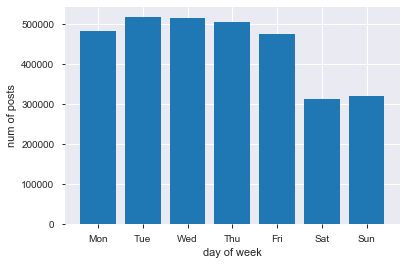

In [19]:
#num of posts happen each day of the week 
_ = plt.bar(hn2019.groupby('day').count()['id'].index, hn2019.groupby('day').count()['id'].values)
_ = plt.xticks(hn2019.groupby('day').count()['id'].index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
_ = plt.xlabel('day of week')
_ = plt.ylabel('num of posts')

In [23]:
hn2019['hour'] = hn2019['date'].dt.hour
hn2019.groupby('hour').count()['id']

hour
0     111264
1      99071
2      92074
3      87160
4      80785
5      78259
6      78998
7      81609
8      84378
9      85021
10     88153
11     97284
12    119208
13    147624
14    175304
15    194707
16    204905
17    207500
18    199233
19    188124
20    182241
21    168144
22    148182
23    127888
Name: id, dtype: int64

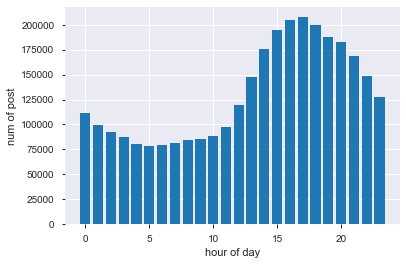

In [24]:
#hour of day posted uct
_ = plt.bar(hn2019.groupby('hour').count()['id'].index, hn2019.groupby('hour').count()['id'].values)
_ = plt.xlabel('hour of day')
_ = plt.ylabel('num of post')

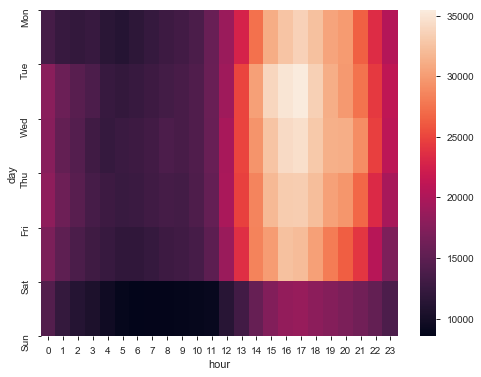

In [39]:
#heatmap day - hour
_ = plt.figure(figsize=(8, 6))
_ = sns.heatmap(hn2019.groupby(['day', 'hour']).count()['id'].unstack())
_ = plt.yticks(hn2019.groupby('day').count()['id'].index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
